## Dimension Reduction

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

import datetime
from datetime import datetime, timedelta

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA

#from pycaret.clustering import *

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("tissue.csv")

In [3]:
df

,x.MAML1,x.LHPP,x.SEPT10,x.B3GNT4,x.ZNF280D,x.SOX12,x.C21orf62,x.PER3,x.HOXA10,x.HOXC5,x.BLVRB,x.ZIM2,x.HEMK1,x.FAP,x.MAN1A1,x.CDA,x.HTR7P1,x.DALRD3,x.FIBP,x.TTTY15,x.SLC30A1,x.SHANK2,x.MSL2,x.UBOX5,x.DUSP13,x.GJB5,x.MTF2,x.PPP1CA,x.IGHMBP2,x.VEGFA,x.KANSL1L,x.FCN3,x.USP32P2,x.HIVEP3,x.HRH1,x.HDAC7,x.HTT,x.IDH3A,x.TLR3,x.F11R,x.MOAP1,x.ISOC2,x.CLIP3,x.FZD10,x.VOPP1,x.RPL4,x.NUDT2,x.RAB30,x.DBI,x.CCDC87,x.GALNT11,x.APBA1,x.IGF2R,x.GNG13,x.KCNE4,x.CETN2,x.OR7A17,x.CINP,x.AQP7,x.CFHR4,x.EXOC6B,x.NDUFS4,x.GALK2,x.NTSR2,x.RPS16,x.FAM30A,x.RRH,x.RPS6KA3,x.CERKL,x.RSRP1,x.H2AFY,x.SMTN,x.GPR171,x.ENPEP,x.ALX4,x.POLL,x.SEMA4A,x.PAFAH1B2,x.LRRN3,x.HNF1A,x.SREBF2,x.NARS2,x.TACC3,x.GALNT2,x.VPS13A,x.ZNF552,x.PA2G4,x.OAZ3,x.CD14,x.SLC38A2,x.HDAC3,x.SPIDR,x.DKKL1,x.DDX49,x.KIN,x.SLC6A11,x.GIP,x.CARD10,x.SUSD6,x.LINC01361,x.PHLDB1,x.SPCS1,x.INF2,x.MAN1A2,x.CELSR2,x.COL1A2,x.UBR2,x.CCL21,x.DMWD,x.KRIT1,x.DDAH2,x.SLC25A5,x.PPME1,x.OPHN1,x.MPZ,x.PRDM14,x.ZC3H7B,x.NECAB3,x.UBE3B,x.ZNF529,x.CRYBA2,x.CCDC86,x.SNAPC3,x.DDX31,x.PRELID3A,x.RPE65,x.ZC3H13,x.IL18R1,x.SREK1,x.AK4,x.VPS51,x.BTG4,x.SDHB,x.EFCAB14,x.KCTD2,x.NDP,x.TMEM185B,x.NUDT11,x.KIR2DL2,x.UQCRC2,x.MPRIP,x.SLC16A4,x.PRR7,x.COL9A1,x.VEGFC,x.GAK,x.NR0B1,x.TMEM104,x.FER1L4,x.RPS11,x.LINC01711,x.C1orf112,x.MYL7,x.LOC643733,x.SAPCD1,x.HSPBAP1,x.GNA11,x.FKBP1B,x.TICAM1,x.GSK3B,x.UBE2O,x.AFDN,x.TICAM2,x.PSMG2,x.BAGE,x.OAZ1,x.TMEM184B,x.WWTR1,x.HHLA1,x.LGALSL,x.LRRC36,x.ARHGEF5,x.TESK2,x.PTPRO,x.FAM184A,x.PLCB1,x.PLEKHO1,x.NBN,x.APOBEC3B,x.ZBTB22,x.LSM1,x.KLRA1P,x.GPA33,x.BDH1,x.EHBP1L1,x.COPB1,x.SLC25A37,x.PBLD,x.MCPH1,x.LOC155060,x.MST1L,x.KCNJ12,x.PRSS3P2,x.NAA11,x.RHOG,x.PTH2R,x.CYP4F11,x.ACAA1,x.SUGP1,x.FOXD1,x.IRS4,x.MUC3A,x.MBTPS1,x.COLGALT2,x.PTGFR,x.KHDRBS1,x.MAPK8IP3,x.PTTG1IP,x.ZNF135,x.MTMR7,x.GYPE,x.RARS,x.GPM6B,x.PMFBP1,x.KLHL9,x.DRG2,x.JAK1,x.TFR2,x.NCOR1,x.IL12RB1,x.COL6A3,x.CLDN10,x.GVINP1,x.EVC,x.TNFAIP2,x.SAMD4B,x.TSFM,x.UBE3A,x.COL4A3BP,x.FCGR3B,x.ATXN3L,x.RAC2,x.ANAPC15,x.RARRES2,x.ATP6V0A2,x.SARDH,x.TBC1D16,x.AATF,x.CHCHD3,x.CASP9,x.BMP8B,x.CAPN3,x.MCTP2,x.SV2B,x.RNF123,x.BCL3,x.RFNG,x.IKZF1,x.RPL3,x.MATN3,x.SAGE1,x.FLI1,x.AGAP1,x.TBX2,x.ARPC5L,x.ZNF274,x.RAB1B,x.IFNA10,x.INE1,x.CD200,x.NAA60,x.NPHP1,x.MSH4,x.GCSH,x.GTF2IRD1,x.ZNF587B,x.LRP4,x.CD93,x.DOCK4,x.VENTXP1,x.NFKBIA,x.PTPRN2,x.NDUFAF7,x.GTF2H3,x.IGKC,x.DKK4,x.KXD1,x.REN,x.ZNF213.AS1,x.B3GALT1,x.PTPRJ,x.ZNF768,x.FOXA2,x.SPTLC3,x.CXorf40A,x.CST8,x.STRAP,x.GJC1,x.DCHS2,x.DNAJC3,x.MARC2,x.SMG1P2,x.BTN2A3P,x.GDF5,x.GRPR,x.CES2,x.LLGL1,x.CELF3,x.FOXK2,x.SHISAL1,x.CYP3A43,x.TRMT2B,x.MEP1B,x.KIF2C,x.VASH2,x.VAT1,x.CLCN1,x.MRPL24,x.POMGNT1,x.CASZ1,x.EEF1E1,x.NOP14.AS1,x.MAP2K6,x.ZNF304,x.ZSWIM8.AS1,x.CYSLTR2,x.AGBL2,x.TMPRSS2,x.SBNO2,x.GREM2,x.SLCO3A1,x.CILP,x.CHMP2A,x.ZNF354A,x.ZNF711,x.SPAST,x.DKFZP434A062,x.CRLF2,x.DDR1.DT,x.LZTS1,x.UTP11,x.MPG,x.EIF4EBP1,x.TUBA4B,x.CEP41,x.PDE4D,x.MORC1,x.ANP32E,x.EPM2AIP1,x.RELB,x.OR3A3,x.ITGA10,x.LTBR,x.MICU2,x.FGD2,x.ULBP2,x.FBN1,x.FAM13A,x.DNAJC28,x.APBB3,x.TBX21,x.PKNOX1,x.SPI1,x.PDC,x.THRB,x.HLA.E,x.ADAMTSL4,x.MYBBP1A,x.IKBKG,x.COL15A1,x.CAMK1G,x.PATJ,x.LANCL2,x.PEX14,x.ZNF43,x.TOP3B,x.SMC2,x.PTPRR,x.TGFBR3,x.DTX4,x.TECPR2,x.OPN3,x.POLR2J3,x.RAB31,x.IRF8,x.TNFRSF21,x.ASTN2,x.ARMCX2,x.SCIN,x.C5orf22,x.CCL2,x.ZBTB43,x.GIGYF2,x.ZFP69B,x.TFB1M,x.ERVH.6,x.H3F3A,x.GRAMD4,x.OR1D4,x.TNFRSF11A,x.ZBTB7C,x.OTC,x.TRIP4,x.RARB,x.PDLIM5,x.SORCS3,x.MYCNOS,x.RCN2,x.EMID1,x.DDT,x.WDR45,x.FBXW4P1,x.MYCBP,x.EXOC3,x.IL10RA,x.ABCC5,x.SPAG4,x.KLF11,x.DLX6,x.FZD2,x.CBARP,x.TCN2,x.GATA2,x.BCKDHB,x.PPM1B,x.TNFRSF13B,x.HAMP,x.KLRD1,x.AP3B2,x.DCTN3,x.ZNF45,x.LTA4H,x.LRIF1,x.CXCL2,x.REEP1,x.WRB,x.RAB5B,x.SMARCD1,x.TFB2M,x.CNTN6,x.FOXE3,x.CEP55,x.ELAC2,x.ZNF767P,x.PCBP4,x.HNRNPUL1,x.KIFAP3,x.TRAV8.3,x.CLCN5,x.BIN1,x.EGFR,x.BZW1,x.NDUFV1,x.WTAP,x.REC8,x.KCMF1,x.LILRB5,x.TFCP2,x.CDH12,x.EHMT2,x.LINC01558,x.ZNHIT3,x.DBF4B,x.GLUD1,x.ADRB2,x.FBXW4,x.SPP1,x.F2R,x.SDF4,x.GALNT8,x.TMEM63A,x.BSCL2,x.GZMM,x.THSD4,x.PRLR,x.PLEKHJ1,x.TLE3,x.PANK2,x.SKP1,x.TOMM70,x.KIAA1324,x.PCDHB12,x.CPA4,x.TRPV2,x.CHCHD2,x.TRPC6,x.MYO

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Columns: 501 entries, x.MAML1 to y
dtypes: float64(500), object(1)
memory usage: 739.9+ KB


In [5]:
df.describe()

,x.MAML1,x.LHPP,x.SEPT10,x.B3GNT4,x.ZNF280D,x.SOX12,x.C21orf62,x.PER3,x.HOXA10,x.HOXC5,x.BLVRB,x.ZIM2,x.HEMK1,x.FAP,x.MAN1A1,x.CDA,x.HTR7P1,x.DALRD3,x.FIBP,x.TTTY15,x.SLC30A1,x.SHANK2,x.MSL2,x.UBOX5,x.DUSP13,x.GJB5,x.MTF2,x.PPP1CA,x.IGHMBP2,x.VEGFA,x.KANSL1L,x.FCN3,x.USP32P2,x.HIVEP3,x.HRH1,x.HDAC7,x.HTT,x.IDH3A,x.TLR3,x.F11R,x.MOAP1,x.ISOC2,x.CLIP3,x.FZD10,x.VOPP1,x.RPL4,x.NUDT2,x.RAB30,x.DBI,x.CCDC87,x.GALNT11,x.APBA1,x.IGF2R,x.GNG13,x.KCNE4,x.CETN2,x.OR7A17,x.CINP,x.AQP7,x.CFHR4,x.EXOC6B,x.NDUFS4,x.GALK2,x.NTSR2,x.RPS16,x.FAM30A,x.RRH,x.RPS6KA3,x.CERKL,x.RSRP1,x.H2AFY,x.SMTN,x.GPR171,x.ENPEP,x.ALX4,x.POLL,x.SEMA4A,x.PAFAH1B2,x.LRRN3,x.HNF1A,x.SREBF2,x.NARS2,x.TACC3,x.GALNT2,x.VPS13A,x.ZNF552,x.PA2G4,x.OAZ3,x.CD14,x.SLC38A2,x.HDAC3,x.SPIDR,x.DKKL1,x.DDX49,x.KIN,x.SLC6A11,x.GIP,x.CARD10,x.SUSD6,x.LINC01361,x.PHLDB1,x.SPCS1,x.INF2,x.MAN1A2,x.CELSR2,x.COL1A2,x.UBR2,x.CCL21,x.DMWD,x.KRIT1,x.DDAH2,x.SLC25A5,x.PPME1,x.OPHN1,x.MPZ,x.PRDM14,x.ZC3H7B,x.NECAB3,x.UBE3B,x.ZNF529,x.CRYBA2,x.CCDC86,x.SNAPC3,x.DDX31,x.PRELID3A,x.RPE65,x.ZC3H13,x.IL18R1,x.SREK1,x.AK4,x.VPS51,x.BTG4,x.SDHB,x.EFCAB14,x.KCTD2,x.NDP,x.TMEM185B,x.NUDT11,x.KIR2DL2,x.UQCRC2,x.MPRIP,x.SLC16A4,x.PRR7,x.COL9A1,x.VEGFC,x.GAK,x.NR0B1,x.TMEM104,x.FER1L4,x.RPS11,x.LINC01711,x.C1orf112,x.MYL7,x.LOC643733,x.SAPCD1,x.HSPBAP1,x.GNA11,x.FKBP1B,x.TICAM1,x.GSK3B,x.UBE2O,x.AFDN,x.TICAM2,x.PSMG2,x.BAGE,x.OAZ1,x.TMEM184B,x.WWTR1,x.HHLA1,x.LGALSL,x.LRRC36,x.ARHGEF5,x.TESK2,x.PTPRO,x.FAM184A,x.PLCB1,x.PLEKHO1,x.NBN,x.APOBEC3B,x.ZBTB22,x.LSM1,x.KLRA1P,x.GPA33,x.BDH1,x.EHBP1L1,x.COPB1,x.SLC25A37,x.PBLD,x.MCPH1,x.LOC155060,x.MST1L,x.KCNJ12,x.PRSS3P2,x.NAA11,x.RHOG,x.PTH2R,x.CYP4F11,x.ACAA1,x.SUGP1,x.FOXD1,x.IRS4,x.MUC3A,x.MBTPS1,x.COLGALT2,x.PTGFR,x.KHDRBS1,x.MAPK8IP3,x.PTTG1IP,x.ZNF135,x.MTMR7,x.GYPE,x.RARS,x.GPM6B,x.PMFBP1,x.KLHL9,x.DRG2,x.JAK1,x.TFR2,x.NCOR1,x.IL12RB1,x.COL6A3,x.CLDN10,x.GVINP1,x.EVC,x.TNFAIP2,x.SAMD4B,x.TSFM,x.UBE3A,x.COL4A3BP,x.FCGR3B,x.ATXN3L,x.RAC2,x.ANAPC15,x.RARRES2,x.ATP6V0A2,x.SARDH,x.TBC1D16,x.AATF,x.CHCHD3,x.CASP9,x.BMP8B,x.CAPN3,x.MCTP2,x.SV2B,x.RNF123,x.BCL3,x.RFNG,x.IKZF1,x.RPL3,x.MATN3,x.SAGE1,x.FLI1,x.AGAP1,x.TBX2,x.ARPC5L,x.ZNF274,x.RAB1B,x.IFNA10,x.INE1,x.CD200,x.NAA60,x.NPHP1,x.MSH4,x.GCSH,x.GTF2IRD1,x.ZNF587B,x.LRP4,x.CD93,x.DOCK4,x.VENTXP1,x.NFKBIA,x.PTPRN2,x.NDUFAF7,x.GTF2H3,x.IGKC,x.DKK4,x.KXD1,x.REN,x.ZNF213.AS1,x.B3GALT1,x.PTPRJ,x.ZNF768,x.FOXA2,x.SPTLC3,x.CXorf40A,x.CST8,x.STRAP,x.GJC1,x.DCHS2,x.DNAJC3,x.MARC2,x.SMG1P2,x.BTN2A3P,x.GDF5,x.GRPR,x.CES2,x.LLGL1,x.CELF3,x.FOXK2,x.SHISAL1,x.CYP3A43,x.TRMT2B,x.MEP1B,x.KIF2C,x.VASH2,x.VAT1,x.CLCN1,x.MRPL24,x.POMGNT1,x.CASZ1,x.EEF1E1,x.NOP14.AS1,x.MAP2K6,x.ZNF304,x.ZSWIM8.AS1,x.CYSLTR2,x.AGBL2,x.TMPRSS2,x.SBNO2,x.GREM2,x.SLCO3A1,x.CILP,x.CHMP2A,x.ZNF354A,x.ZNF711,x.SPAST,x.DKFZP434A062,x.CRLF2,x.DDR1.DT,x.LZTS1,x.UTP11,x.MPG,x.EIF4EBP1,x.TUBA4B,x.CEP41,x.PDE4D,x.MORC1,x.ANP32E,x.EPM2AIP1,x.RELB,x.OR3A3,x.ITGA10,x.LTBR,x.MICU2,x.FGD2,x.ULBP2,x.FBN1,x.FAM13A,x.DNAJC28,x.APBB3,x.TBX21,x.PKNOX1,x.SPI1,x.PDC,x.THRB,x.HLA.E,x.ADAMTSL4,x.MYBBP1A,x.IKBKG,x.COL15A1,x.CAMK1G,x.PATJ,x.LANCL2,x.PEX14,x.ZNF43,x.TOP3B,x.SMC2,x.PTPRR,x.TGFBR3,x.DTX4,x.TECPR2,x.OPN3,x.POLR2J3,x.RAB31,x.IRF8,x.TNFRSF21,x.ASTN2,x.ARMCX2,x.SCIN,x.C5orf22,x.CCL2,x.ZBTB43,x.GIGYF2,x.ZFP69B,x.TFB1M,x.ERVH.6,x.H3F3A,x.GRAMD4,x.OR1D4,x.TNFRSF11A,x.ZBTB7C,x.OTC,x.TRIP4,x.RARB,x.PDLIM5,x.SORCS3,x.MYCNOS,x.RCN2,x.EMID1,x.DDT,x.WDR45,x.FBXW4P1,x.MYCBP,x.EXOC3,x.IL10RA,x.ABCC5,x.SPAG4,x.KLF11,x.DLX6,x.FZD2,x.CBARP,x.TCN2,x.GATA2,x.BCKDHB,x.PPM1B,x.TNFRSF13B,x.HAMP,x.KLRD1,x.AP3B2,x.DCTN3,x.ZNF45,x.LTA4H,x.LRIF1,x.CXCL2,x.REEP1,x.WRB,x.RAB5B,x.SMARCD1,x.TFB2M,x.CNTN6,x.FOXE3,x.CEP55,x.ELAC2,x.ZNF767P,x.PCBP4,x.HNRNPUL1,x.KIFAP3,x.TRAV8.3,x.CLCN5,x.BIN1,x.EGFR,x.BZW1,x.NDUFV1,x.WTAP,x.REC8,x.KCMF1,x.LILRB5,x.TFCP2,x.CDH12,x.EHMT2,x.LINC01558,x.ZNHIT3,x.DBF4B,x.GLUD1,x.ADRB2,x.FBXW4,x.SPP1,x.F2R,x.SDF4,x.GALNT8,x.TMEM63A,x.BSCL2,x.GZMM,x.THSD4,x.PRLR,x.PLEKHJ1,x.TLE3,x.PANK2,x.SKP1,x.TOMM70,x.KIAA1324,x.PCDHB12,x.CPA4,x.TRPV2,x.CHCHD2,x.TRPC6,x.MYO

In [6]:
df.columns

Index(['x.MAML1', 'x.LHPP', 'x.SEPT10', 'x.B3GNT4', 'x.ZNF280D', 'x.SOX12', 'x.C21orf62', 'x.PER3', 'x.HOXA10', 'x.HOXC5',
       ...
       'x.EPHA1', 'x.MFGE8', 'x.OAZ2', 'x.PCBP3', 'x.POLA1', 'x.KREMEN2', 'x.CYP7B1', 'x.LILRB3', 'x.GSAP', 'y'], dtype='object', length=501)

In [7]:
df.shape

(189, 501)

In [8]:
le = LabelEncoder()

In [9]:
df["y"] = le.fit_transform(df["y"])

In [10]:
df.head()

,x.MAML1,x.LHPP,x.SEPT10,x.B3GNT4,x.ZNF280D,x.SOX12,x.C21orf62,x.PER3,x.HOXA10,x.HOXC5,x.BLVRB,x.ZIM2,x.HEMK1,x.FAP,x.MAN1A1,x.CDA,x.HTR7P1,x.DALRD3,x.FIBP,x.TTTY15,x.SLC30A1,x.SHANK2,x.MSL2,x.UBOX5,x.DUSP13,x.GJB5,x.MTF2,x.PPP1CA,x.IGHMBP2,x.VEGFA,x.KANSL1L,x.FCN3,x.USP32P2,x.HIVEP3,x.HRH1,x.HDAC7,x.HTT,x.IDH3A,x.TLR3,x.F11R,x.MOAP1,x.ISOC2,x.CLIP3,x.FZD10,x.VOPP1,x.RPL4,x.NUDT2,x.RAB30,x.DBI,x.CCDC87,x.GALNT11,x.APBA1,x.IGF2R,x.GNG13,x.KCNE4,x.CETN2,x.OR7A17,x.CINP,x.AQP7,x.CFHR4,x.EXOC6B,x.NDUFS4,x.GALK2,x.NTSR2,x.RPS16,x.FAM30A,x.RRH,x.RPS6KA3,x.CERKL,x.RSRP1,x.H2AFY,x.SMTN,x.GPR171,x.ENPEP,x.ALX4,x.POLL,x.SEMA4A,x.PAFAH1B2,x.LRRN3,x.HNF1A,x.SREBF2,x.NARS2,x.TACC3,x.GALNT2,x.VPS13A,x.ZNF552,x.PA2G4,x.OAZ3,x.CD14,x.SLC38A2,x.HDAC3,x.SPIDR,x.DKKL1,x.DDX49,x.KIN,x.SLC6A11,x.GIP,x.CARD10,x.SUSD6,x.LINC01361,x.PHLDB1,x.SPCS1,x.INF2,x.MAN1A2,x.CELSR2,x.COL1A2,x.UBR2,x.CCL21,x.DMWD,x.KRIT1,x.DDAH2,x.SLC25A5,x.PPME1,x.OPHN1,x.MPZ,x.PRDM14,x.ZC3H7B,x.NECAB3,x.UBE3B,x.ZNF529,x.CRYBA2,x.CCDC86,x.SNAPC3,x.DDX31,x.PRELID3A,x.RPE65,x.ZC3H13,x.IL18R1,x.SREK1,x.AK4,x.VPS51,x.BTG4,x.SDHB,x.EFCAB14,x.KCTD2,x.NDP,x.TMEM185B,x.NUDT11,x.KIR2DL2,x.UQCRC2,x.MPRIP,x.SLC16A4,x.PRR7,x.COL9A1,x.VEGFC,x.GAK,x.NR0B1,x.TMEM104,x.FER1L4,x.RPS11,x.LINC01711,x.C1orf112,x.MYL7,x.LOC643733,x.SAPCD1,x.HSPBAP1,x.GNA11,x.FKBP1B,x.TICAM1,x.GSK3B,x.UBE2O,x.AFDN,x.TICAM2,x.PSMG2,x.BAGE,x.OAZ1,x.TMEM184B,x.WWTR1,x.HHLA1,x.LGALSL,x.LRRC36,x.ARHGEF5,x.TESK2,x.PTPRO,x.FAM184A,x.PLCB1,x.PLEKHO1,x.NBN,x.APOBEC3B,x.ZBTB22,x.LSM1,x.KLRA1P,x.GPA33,x.BDH1,x.EHBP1L1,x.COPB1,x.SLC25A37,x.PBLD,x.MCPH1,x.LOC155060,x.MST1L,x.KCNJ12,x.PRSS3P2,x.NAA11,x.RHOG,x.PTH2R,x.CYP4F11,x.ACAA1,x.SUGP1,x.FOXD1,x.IRS4,x.MUC3A,x.MBTPS1,x.COLGALT2,x.PTGFR,x.KHDRBS1,x.MAPK8IP3,x.PTTG1IP,x.ZNF135,x.MTMR7,x.GYPE,x.RARS,x.GPM6B,x.PMFBP1,x.KLHL9,x.DRG2,x.JAK1,x.TFR2,x.NCOR1,x.IL12RB1,x.COL6A3,x.CLDN10,x.GVINP1,x.EVC,x.TNFAIP2,x.SAMD4B,x.TSFM,x.UBE3A,x.COL4A3BP,x.FCGR3B,x.ATXN3L,x.RAC2,x.ANAPC15,x.RARRES2,x.ATP6V0A2,x.SARDH,x.TBC1D16,x.AATF,x.CHCHD3,x.CASP9,x.BMP8B,x.CAPN3,x.MCTP2,x.SV2B,x.RNF123,x.BCL3,x.RFNG,x.IKZF1,x.RPL3,x.MATN3,x.SAGE1,x.FLI1,x.AGAP1,x.TBX2,x.ARPC5L,x.ZNF274,x.RAB1B,x.IFNA10,x.INE1,x.CD200,x.NAA60,x.NPHP1,x.MSH4,x.GCSH,x.GTF2IRD1,x.ZNF587B,x.LRP4,x.CD93,x.DOCK4,x.VENTXP1,x.NFKBIA,x.PTPRN2,x.NDUFAF7,x.GTF2H3,x.IGKC,x.DKK4,x.KXD1,x.REN,x.ZNF213.AS1,x.B3GALT1,x.PTPRJ,x.ZNF768,x.FOXA2,x.SPTLC3,x.CXorf40A,x.CST8,x.STRAP,x.GJC1,x.DCHS2,x.DNAJC3,x.MARC2,x.SMG1P2,x.BTN2A3P,x.GDF5,x.GRPR,x.CES2,x.LLGL1,x.CELF3,x.FOXK2,x.SHISAL1,x.CYP3A43,x.TRMT2B,x.MEP1B,x.KIF2C,x.VASH2,x.VAT1,x.CLCN1,x.MRPL24,x.POMGNT1,x.CASZ1,x.EEF1E1,x.NOP14.AS1,x.MAP2K6,x.ZNF304,x.ZSWIM8.AS1,x.CYSLTR2,x.AGBL2,x.TMPRSS2,x.SBNO2,x.GREM2,x.SLCO3A1,x.CILP,x.CHMP2A,x.ZNF354A,x.ZNF711,x.SPAST,x.DKFZP434A062,x.CRLF2,x.DDR1.DT,x.LZTS1,x.UTP11,x.MPG,x.EIF4EBP1,x.TUBA4B,x.CEP41,x.PDE4D,x.MORC1,x.ANP32E,x.EPM2AIP1,x.RELB,x.OR3A3,x.ITGA10,x.LTBR,x.MICU2,x.FGD2,x.ULBP2,x.FBN1,x.FAM13A,x.DNAJC28,x.APBB3,x.TBX21,x.PKNOX1,x.SPI1,x.PDC,x.THRB,x.HLA.E,x.ADAMTSL4,x.MYBBP1A,x.IKBKG,x.COL15A1,x.CAMK1G,x.PATJ,x.LANCL2,x.PEX14,x.ZNF43,x.TOP3B,x.SMC2,x.PTPRR,x.TGFBR3,x.DTX4,x.TECPR2,x.OPN3,x.POLR2J3,x.RAB31,x.IRF8,x.TNFRSF21,x.ASTN2,x.ARMCX2,x.SCIN,x.C5orf22,x.CCL2,x.ZBTB43,x.GIGYF2,x.ZFP69B,x.TFB1M,x.ERVH.6,x.H3F3A,x.GRAMD4,x.OR1D4,x.TNFRSF11A,x.ZBTB7C,x.OTC,x.TRIP4,x.RARB,x.PDLIM5,x.SORCS3,x.MYCNOS,x.RCN2,x.EMID1,x.DDT,x.WDR45,x.FBXW4P1,x.MYCBP,x.EXOC3,x.IL10RA,x.ABCC5,x.SPAG4,x.KLF11,x.DLX6,x.FZD2,x.CBARP,x.TCN2,x.GATA2,x.BCKDHB,x.PPM1B,x.TNFRSF13B,x.HAMP,x.KLRD1,x.AP3B2,x.DCTN3,x.ZNF45,x.LTA4H,x.LRIF1,x.CXCL2,x.REEP1,x.WRB,x.RAB5B,x.SMARCD1,x.TFB2M,x.CNTN6,x.FOXE3,x.CEP55,x.ELAC2,x.ZNF767P,x.PCBP4,x.HNRNPUL1,x.KIFAP3,x.TRAV8.3,x.CLCN5,x.BIN1,x.EGFR,x.BZW1,x.NDUFV1,x.WTAP,x.REC8,x.KCMF1,x.LILRB5,x.TFCP2,x.CDH12,x.EHMT2,x.LINC01558,x.ZNHIT3,x.DBF4B,x.GLUD1,x.ADRB2,x.FBXW4,x.SPP1,x.F2R,x.SDF4,x.GALNT8,x.TMEM63A,x.BSCL2,x.GZMM,x.THSD4,x.PRLR,x.PLEKHJ1,x.TLE3,x.PANK2,x.SKP1,x.TOMM70,x.KIAA1324,x.PCDHB12,x.CPA4,x.TRPV2,x.CHCHD2,x.TRPC6,x.MYO

In [11]:
df.y.value_counts()

4    39
0    38
1    34
3    31
5    26
2    15
6     6
Name: y, dtype: int64

In [12]:
X = df.iloc[:,0:500]

In [13]:
X.values

array([[ 9.82567961,  8.3271627 ,  5.4993819 , ...,  4.76001706,
         8.23018205,  6.74038468],
       [ 9.63124675,  8.54282676,  5.64429229, ...,  4.95237261,
         8.33250157,  6.39068256],
       [ 9.69054774,  8.47648577,  5.71718694, ...,  4.79623236,
         7.97819429,  6.67703781],
       ...,
       [ 9.3618059 ,  8.26365314, 10.29656824, ...,  4.88436628,
         8.1768516 ,  5.61143535],
       [ 9.3460355 ,  8.71853424,  9.66081321, ...,  4.9512614 ,
         8.63041198,  5.79046804],
       [ 9.44789324,  8.25538598,  8.46580862, ...,  4.99628241,
         8.70066461,  5.17747408]])

In [14]:
y = df.iloc[:,500]

In [15]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6])

## Standardize all values

In [16]:
#scaler = StandardScaler()

In [17]:
#X_scaled = scaler.fit_transform(X)

In [18]:
#X_scaled

### Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((151, 500), (38, 500), (151,), (38,))

We want to explore the tissue_gene_expression predictors by plotting them.

We want to get an idea of which observations are close to each other, but, as you can see from the dimensions, the predictors are 500-dimensional, making plotting difficult. Plot the first two principal components with color representing tissue type.

## Principal Component Analysis

In [21]:
pca2 = PCA(n_components=2)

In [22]:
X_train_2 = pca2.fit_transform(X_train)

In [23]:
X_test_2 = pca2.transform(X_test)

In [24]:
X_train_2[:10]

array([[-11.36249616,   2.49799156],
       [-12.76639262,   1.13606712],
       [-11.08896654,   2.58313824],
       [ -7.51368045,   4.80050487],
       [-11.0007396 ,   0.47290279],
       [ 13.62215967,  12.10906118],
       [ 13.05799259,  11.37898862],
       [-10.5100072 ,   2.49751789],
       [-11.91627775,   2.64860675],
       [ -4.69197196,  -0.49288677]])

In [25]:
X_test_2[:10]

array([[-12.00432817,   1.9418057 ],
       [  3.63737494,  -7.5571336 ],
       [ 13.07045407,   9.71508314],
       [ -9.28540582,   2.92902461],
       [  4.92760461,  -0.38571447],
       [  5.11684486,  -5.18825793],
       [-12.40510674,   1.69474849],
       [  5.19617508,  -2.24974106],
       [  6.6457652 ,  -4.61282775],
       [-11.71354255,   1.84380838]])

In [26]:
graph = pd.DataFrame(X_train_2, columns=['A','B'])
graph

,A,B
0,-11.36,2.50
1,-12.77,1.14
2,-11.09,2.58
3,-7.51,4.80
4,-11.00,0.47
...,...,...
146,-12.16,2.58
147,6.26,-6.89
148,-11.15,1.05
149,4.11,-8.05


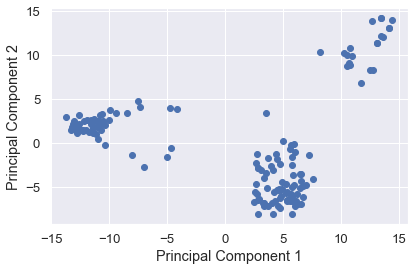

In [27]:
plt.scatter(x=graph.A,y=graph.B)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

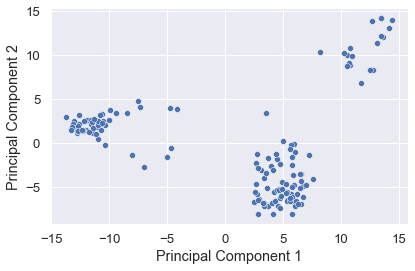

In [28]:
sns.scatterplot(x=graph.A, y=graph.B)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

The predictors for each observation are measured using the same device and experimental procedure. This introduces biases that can affect all the predictors from one observation. For each observation, compute the average across all predictors, and then plot this against the first PC with color representing tissue. Report the correlation.

We see an association with the first PC and the observation averages. Redo the PCA but only after removing the center. Part of the code is provided for you.

For the first 10 PCs, make a boxplot showing the values for each tissue. 

In [29]:
pca10 = PCA(n_components=10, random_state=0, svd_solver='full')

In [30]:
X_train_10 = pca10.fit_transform(X_train)

In [31]:
X_test_10 = pca10.transform(X_test)

In [32]:
X_train_10

array([[-11.36249616,   2.49799156,   4.24313859, ...,  -0.3278914 ,
         -1.27182764,  -0.12091028],
       [-12.76639262,   1.13606712,  -0.50737975, ...,  -0.50189365,
         -0.02510793,  -1.21251301],
       [-11.08896654,   2.58313824,   3.64229637, ...,   0.56257487,
         -0.70126003,  -0.84757171],
       ...,
       [-11.14785552,   1.05175966,   0.53345912, ...,  -1.73218898,
          2.0827726 ,   2.41501943],
       [  4.11454099,  -8.05146851,  -5.42727049, ...,  -2.20510062,
         -0.32344761,   0.39530795],
       [ 13.42674935,  14.25097846,  -0.04062709, ...,   0.73417707,
         -0.41142001,   0.95735067]])

In [33]:
pca10df = pd.DataFrame(X_train_10, columns=['A','B','C','D','E','F','G','H','I','J'])
pca10df

,A,B,C,D,E,F,G,H,I,J
0,-11.36,2.50,4.24,5.30,-2.67,1.93,0.36,-0.33,-1.27,-0.12
1,-12.77,1.14,-0.51,-4.20,1.57,-0.23,-0.36,-0.50,-0.03,-1.21
2,-11.09,2.58,3.64,5.58,-3.68,0.78,-0.92,0.56,-0.70,-0.85
3,-7.51,4.80,-4.14,9.49,0.91,-2.66,2.45,2.80,-1.26,-1.10
4,-11.00,0.47,4.01,3.87,-3.73,2.51,0.24,-0.30,-0.38,-0.19
...,...,...,...,...,...,...,...,...,...,...
146,-12.16,2.58,3.46,4.96,-2.32,2.80,0.93,-0.46,-0.07,0.05
147,6.26,-6.89,-5.70,0.05,-2.02,0.94,-2.62,1.23,0.71,1.65
148,-11.15,1.05,0.53,2.19,0.09,1.28,-0.02,-1.73,2.08,2.42
149,4.11,-8.05,-5.43,0.16,-2.29,4.63,-2.31,-2.21,-0.32,0.40


For the 7th PC, which two tissues have the greatest median difference?

Plot the percent variance explained by PC number. 

In [34]:
pca10.explained_variance_

array([79.26909174, 33.00165013, 23.25161993, 14.26469098, 11.44326205,
        9.87483387,  7.1066941 ,  4.89923445,  4.00379128,  3.31165463])

In [35]:
pca10var = pd.DataFrame(pca10.explained_variance_.T, index=['A','B','C','D','E','F','G','H','I','J'], columns=["var"])
pca10var

,var
A,79.27
B,33.00
C,23.25
D,14.26
E,11.44
F,9.87
G,7.11
H,4.90
I,4.00
J,3.31


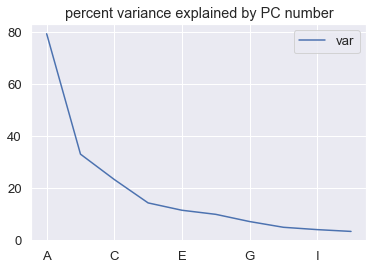

In [36]:
pca10var.plot()
plt.title("percent variance explained by PC number")
plt.show()

How many PCs are required to reach a cumulative percent variance explained greater than 50%?